In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

import EDA_functions as func

In [2]:
site = "C"

In [3]:
# load the data
# get parent directory
os.chdir("..")
data_directory = 'Data'

data_name = site + "_TurbineData.csv"
flag_name = site + "_FullPerformanceFlag.csv"

# read the data
data = pd.read_csv(os.path.join(os.getcwd(), data_directory, data_name))
flag = pd.read_csv(os.path.join(os.getcwd(), data_directory, flag_name))

# reset to current directory
fd = sys.path[0]
os.chdir(fd)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106805 entries, 0 to 1106804
Data columns (total 27 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   Unnamed: 0                     1106805 non-null  int64  
 1   ts                             1106805 non-null  object 
 2   instanceID                     1106805 non-null  object 
 3   AoARel                         1096216 non-null  float64
 4   bladePitch                     1096391 non-null  float64
 5   bladePitchMax                  1096391 non-null  float64
 6   bladePitchMin                  1096391 non-null  float64
 7   bladePitchSetPoint             0 non-null        float64
 8   bladePitchStd                  0 non-null        float64
 9   cP                             1095614 non-null  float64
 10  generatorTorque                1071742 non-null  float64
 11  rotorTorque                    1047007 non-null  float64
 12  TI            

In [5]:
flag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106805 entries, 0 to 1106804
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1106805 non-null  int64 
 1   ts          1106805 non-null  object
 2   instanceID  1106805 non-null  object
 3   value       1106805 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 33.8+ MB


In [6]:
# print the number of turbines and the turbine IDs
turbine_count = data['instanceID'].nunique()
turbine_name = data['instanceID'].unique()
print(turbine_count)
print(turbine_name)

21
['C_WTG01' 'C_WTG02' 'C_WTG03' 'C_WTG04' 'C_WTG05' 'C_WTG06' 'C_WTG07'
 'C_WTG08' 'C_WTG09' 'C_WTG10' 'C_WTG11' 'C_WTG12' 'C_WTG13' 'C_WTG14'
 'C_WTG15' 'C_WTG16' 'C_WTG17' 'C_WTG18' 'C_WTG19' 'C_WTG20' 'C_WTG21']


**Comment:** data size: 1106805 x 26; flag size: 1106805 x 3. There are 21 turbines. 366 x 21 x 24 x 6 + 21 = 1106805. No missing rows.

In [7]:
# add the boolean flag signal to the data
data['value'] = flag['value']

# drop irrelevant columns
data = data.drop(columns = ['AoARel', 'bladePitch', 'bladePitchMax',
       'bladePitchMin', 'bladePitchSetPoint', 'bladePitchStd', 'cP',
       'generatorTorque', 'rotorTorque', 'TSR',
       'Wind_direction', 'Nacelle_position', 'Nacelle_temperature',
       'Rotor_speed', 'Power_Minimum', 'Power_Maximum', 'Generator_RPM', 'Generator_RPM_Max',
       'Generator_RPM_Min'])

In [8]:
# Add month, day, and hour
data['ts'] = pd.to_datetime(data['ts'], format = '%d-%b-%Y %H:%M:%S')
data['Month'] = data.ts.dt.month
data['Day'] = data.ts.dt.day
data['Hour'] = data.ts.dt.hour

In [9]:
data.columns.values

array(['Unnamed: 0', 'ts', 'instanceID', 'TI', 'Wind_speed', 'Power',
       'Ambient_temperature', 'Wind_speed_Standard_deviation', 'value',
       'Month', 'Day', 'Hour'], dtype=object)

In [10]:
# Rearrange columns
data = data.reindex(columns = ['ts',  'Month' , 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_Standard_deviation', 
                               'TI', 'Ambient_temperature', 'Power', 'value'])

# rename columns 
data.columns = ['ts',  'Month', 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_sd', 'TI', 
                'Temperature', 'Power', 'value']

In [11]:
data.sample(5, random_state = 10)

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power,value
258497,2020-03-26 11:30:00,3,26,11,C_WTG09,2.089356,0.370469,17.731258,8.920000,-1.947986,0
860845,2020-10-11 16:00:00,10,11,16,C_WTG14,2.626837,0.466763,17.769033,9.720000,1.710527,0
731106,2020-08-29 18:20:00,8,29,18,C_WTG13,7.082959,0.705398,9.959088,12.198333,781.059869,1
1087165,2020-12-25 12:10:00,12,25,12,C_WTG17,6.239500,0.972592,15.587659,5.190000,678.849797,1
840919,2020-10-05 01:50:00,10,5,1,C_WTG17,3.014098,0.494606,16.409767,12.191666,15.545936,0


In [12]:
data.describe()

,Month,Day,Hour,Wind_speed,Wind_speed_sd,TI,Temperature,Power,value
count,1.106805e+06,1.106805e+06,1.106805e+06,1.096412e+06,1.096391e+06,1.095593e+06,1.096391e+06,1.096412e+06,1.106805e+06
mean,6.513557e+00,1.575655e+01,1.149978e+01,6.011786e+00,9.625277e-01,1.777810e+01,9.143693e+00,6.070750e+02,7.702414e-01
std,3.451286e+00,8.811684e+00,6.922305e+00,3.166792e+00,5.433821e-01,1.145427e+01,4.414146e+00,6.705410e+02,4.206777e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,-6.877875e-01,0.000000e+00,-3.439928e+03,-2.251667e+00,-1.702481e+01,0.000000e+00
25%,4.000000e+00,8.000000e+00,5.000000e+00,3.648873e+00,5.862341e-01,1.244820e+01,5.896667e+00,4.424740e+01,1.000000e+00
50%,7.000000e+00,1.600000e+01,1.100000e+01,5.575035e+00,8.574604e-01,1.600053e+01,8.688333e+00,3.219592e+02,1.000000e+00
75%,1.000000e+01,2.300000e+01,1.700000e+01,7.899354e+00,1.213837e+00,2.051353e+01,1.199333e+01,1.016879e+03,1.000000e+00
max,1.200000e+01,3.100000e+01,2.300000e+01,2.632746e+01,8.795385e+00,2.717206e+03,2.803167e+01,2.080103e+03,1.000000e+00


### Plot time series

In [13]:
# select one turbine
data_01 = data[data['instanceID'] == site + '_WTG01']

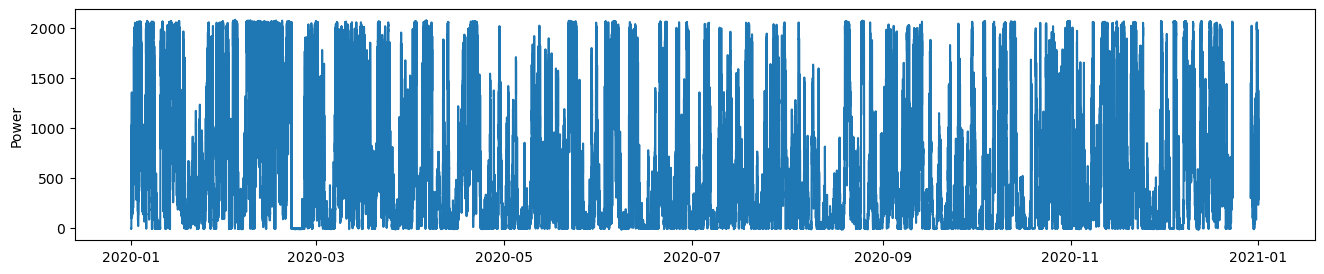

In [14]:
func.plot_timeseries(data_01, 'Power')

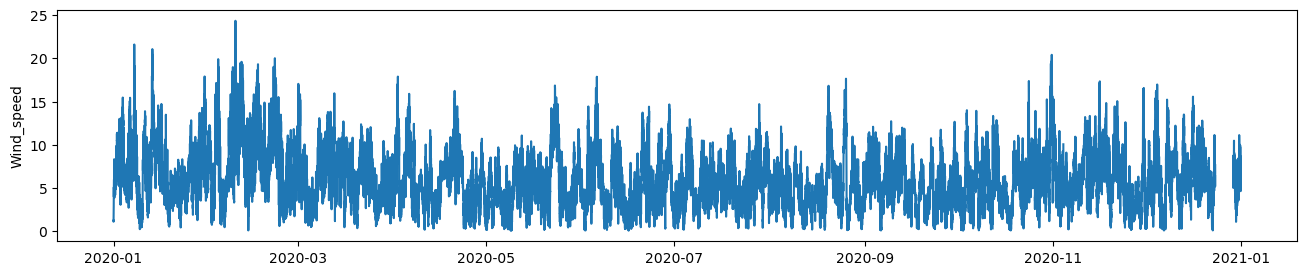

In [15]:
func.plot_timeseries(data_01, 'Wind_speed')

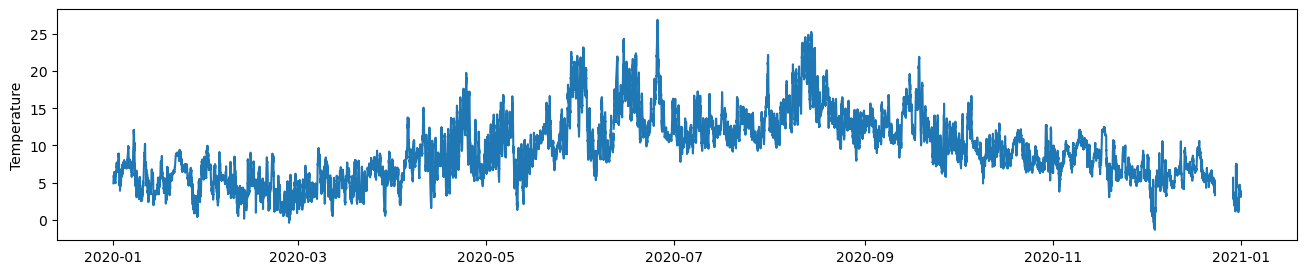

In [16]:
func.plot_timeseries(data_01, 'Temperature')

### Full performance data

In [17]:
# sort the turbine IDs and create a list of the IDs
instanceID = sorted(data.instanceID.unique().tolist())
ID = [instanceID[i][5:] for i in range (len(instanceID))] 

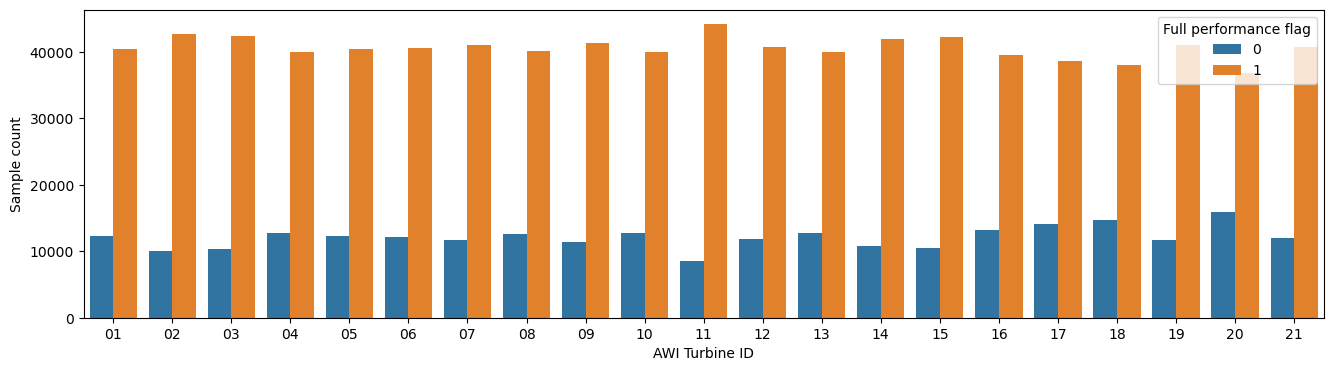

In [18]:
# Plot bar chart of full performance flag vs sample count for each turbine
bar = data.groupby(by=['instanceID','value']).count().reset_index()
func.plot_fullperformanceflag(df=bar, order=instanceID, xticklabels=ID, figsize = (16,4), orient = "v")

In [19]:
# only select rows with flag value = 1
data = data[data['value'] == 1]

# drop irrelevant columns 
data = data.drop(columns = ['value'])

In [20]:
# remove invalid values and null entries. 
# acceptable TI range: [0, 100]
# acceptable temperature range: [-5, 40]
data_clean = func.clean_data(data)
data_clean

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power
3,2020-01-01 00:00:00,1,1,0,C_WTG04,4.695373,0.712574,15.176091,5.270000,160.230282
4,2020-01-01 00:00:00,1,1,0,C_WTG05,3.614577,0.569317,15.750575,5.451667,64.632802
5,2020-01-01 00:00:00,1,1,0,C_WTG06,3.526409,0.681956,19.338555,5.393333,65.132216
6,2020-01-01 00:00:00,1,1,0,C_WTG07,4.067837,0.638995,15.708470,5.593333,100.370317
7,2020-01-01 00:00:00,1,1,0,C_WTG08,4.145381,0.684033,16.501090,6.593333,137.044755
...,...,...,...,...,...,...,...,...,...,...
1106518,2020-12-31 21:50:00,12,31,21,C_WTG08,3.462383,0.802970,23.191250,5.073333,43.471178
1106602,2020-12-31 22:30:00,12,31,22,C_WTG08,6.659352,1.027965,15.436412,5.024138,591.429897
1106623,2020-12-31 22:40:00,12,31,22,C_WTG08,4.604579,1.572165,34.143509,5.223333,233.237044
1106707,2020-12-31 23:20:00,12,31,23,C_WTG08,4.924803,0.711829,14.453960,5.158621,193.766015


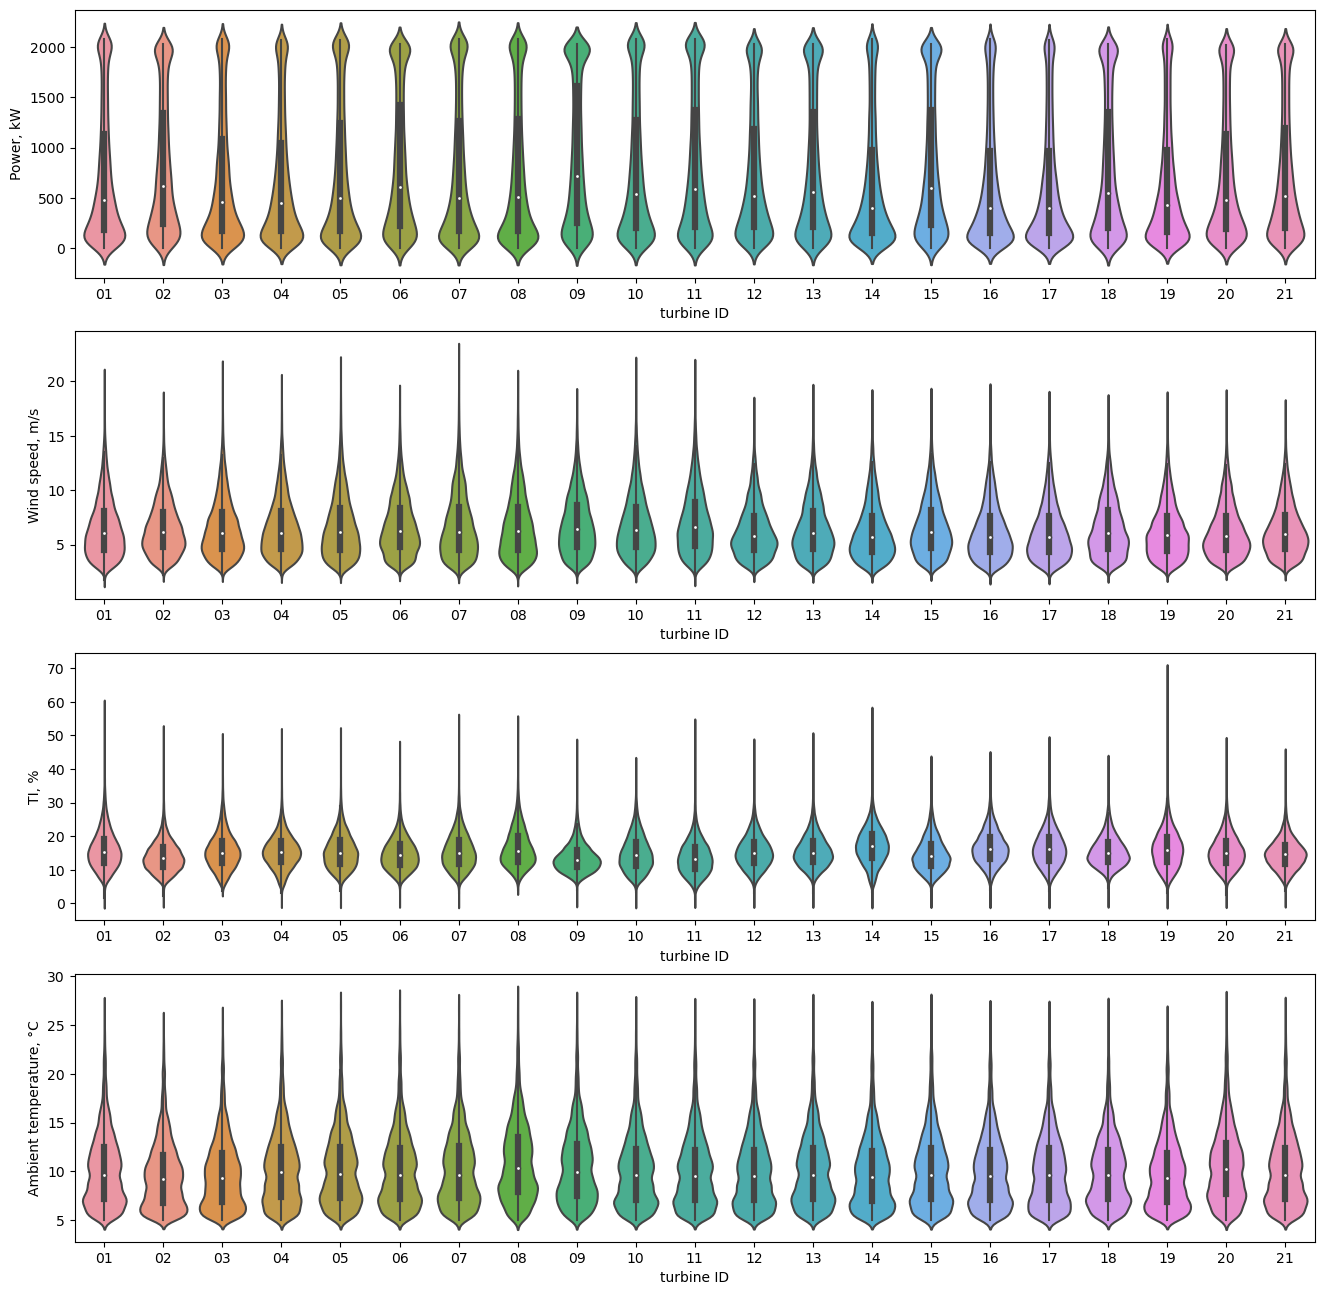

In [21]:
# Make violin plots of the variables 
var = [ 'Power','Wind_speed', 'TI','Temperature']
var_name = [ 'Power, kW','Wind speed, m/s', 'TI, %','Ambient temperature, °C']

func.plot_violinplot(df=data_clean, var=var, var_name=var_name, order=instanceID, 
                xticklabels=ID, figsize=(16, 16), orient = "v")

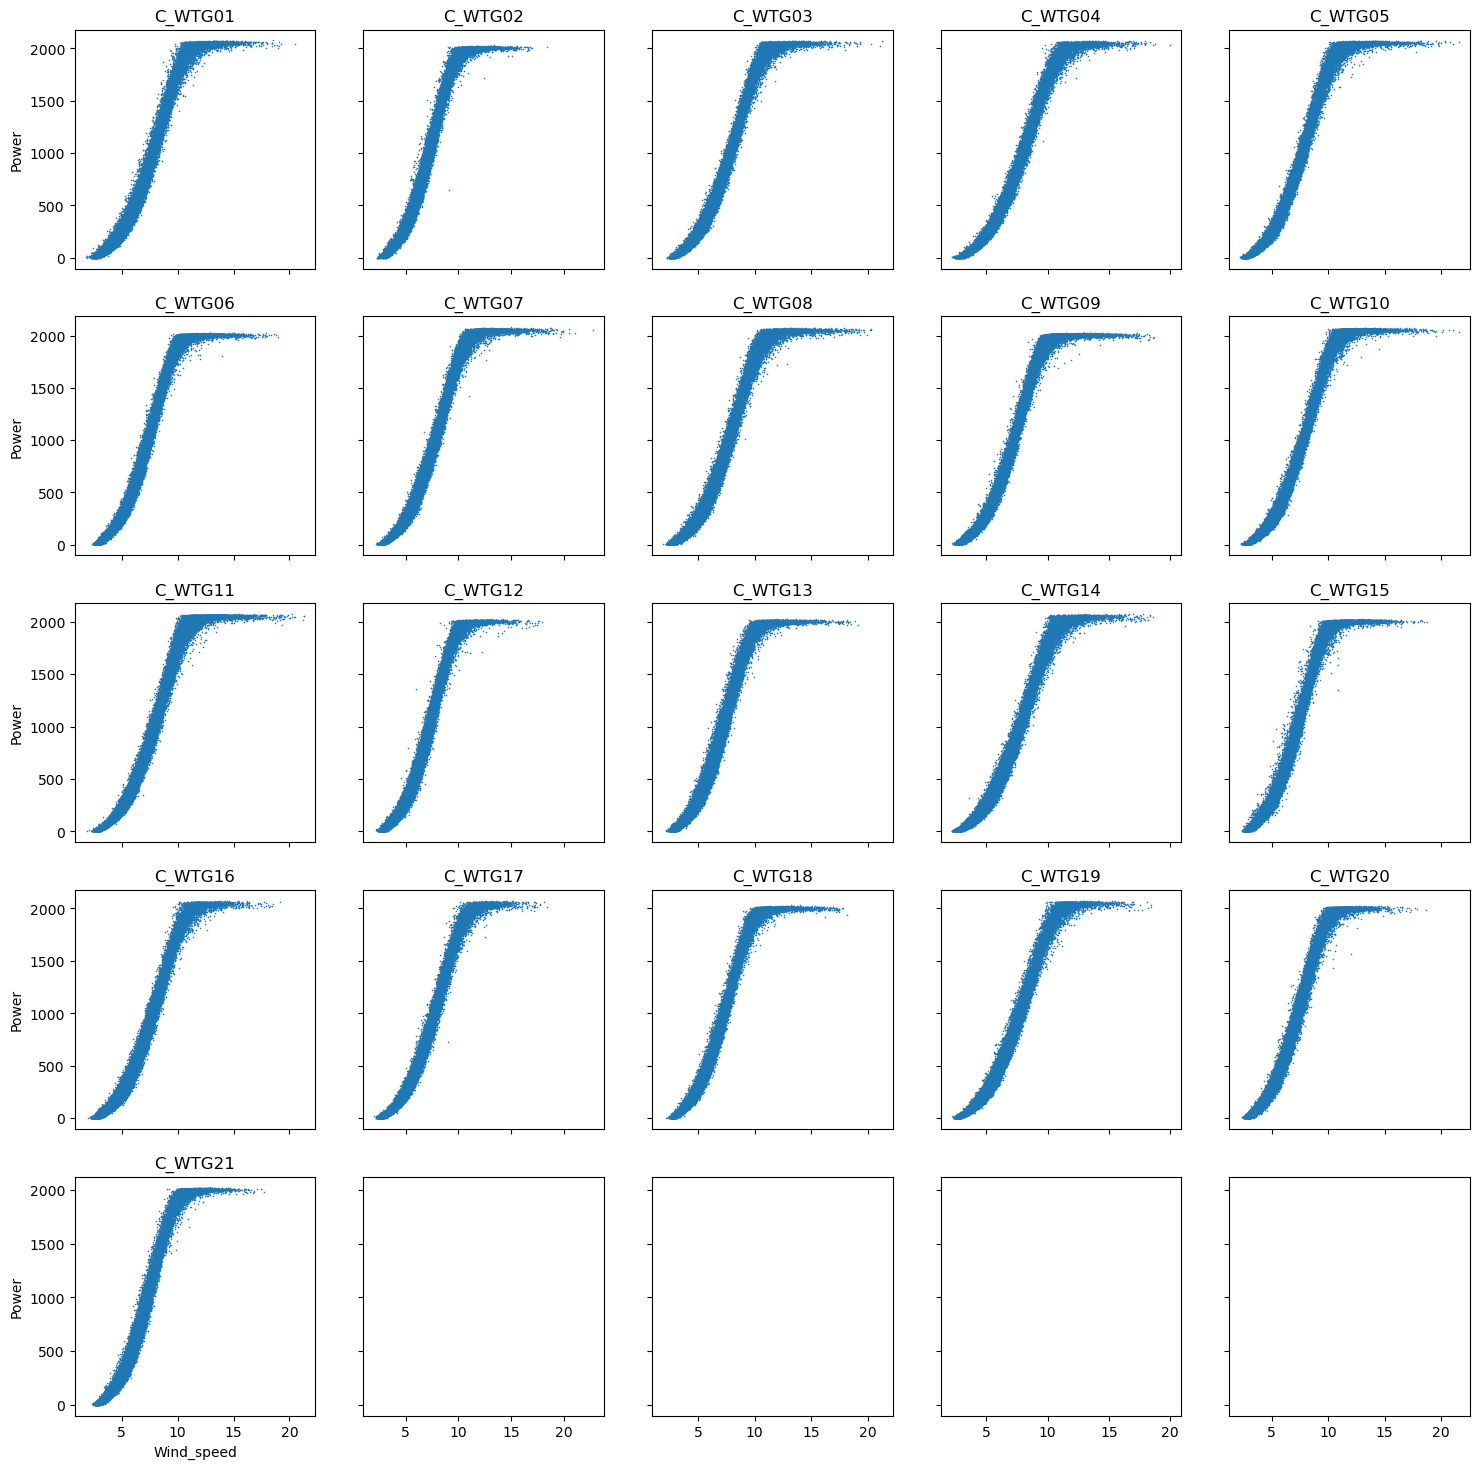

In [22]:
# Plot power curve for each turbine
func.plot_powercurve(df=data_clean, order=instanceID, figsize=(18,18))

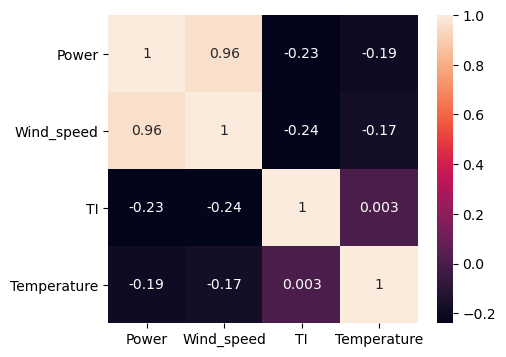

In [23]:
# Plot correlation between variables
plt.figure(figsize = (5,4))
sns.heatmap(data_clean[var].corr(), annot=True)
plt.show()

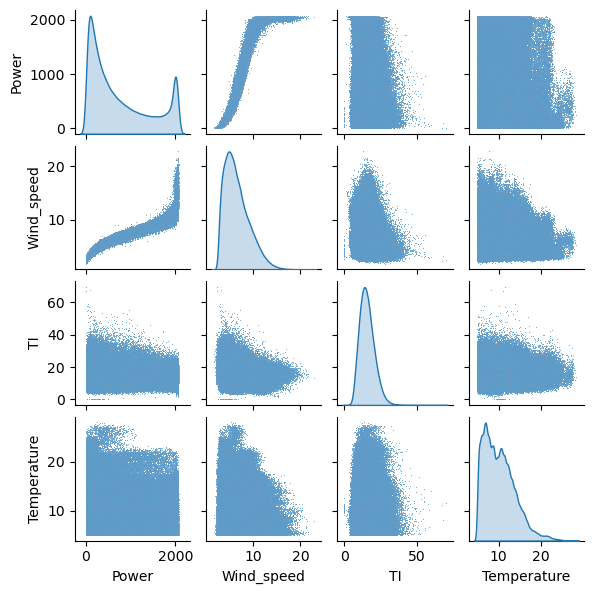

In [25]:
# Make pairplot of the variables
sns.pairplot(data_clean, vars = var, diag_kind = 'kde', plot_kws={'s' : 0.5}, height = 1.5)
plt.show()

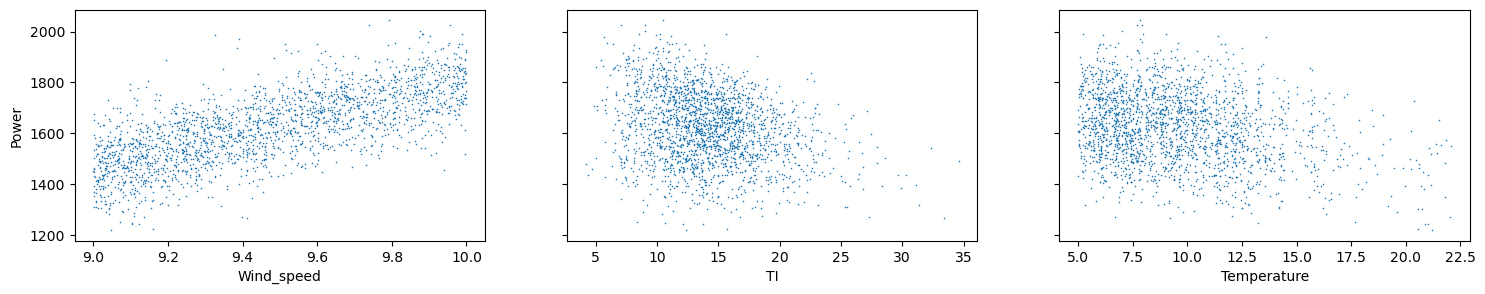

In [26]:
x_var = ["Wind_speed", "TI", "Temperature"]
func.plot_vars(df=data_clean, turbine_name= site + "_WTG01", ws_range=(9,10), x_var = x_var, figsize=(18,3))

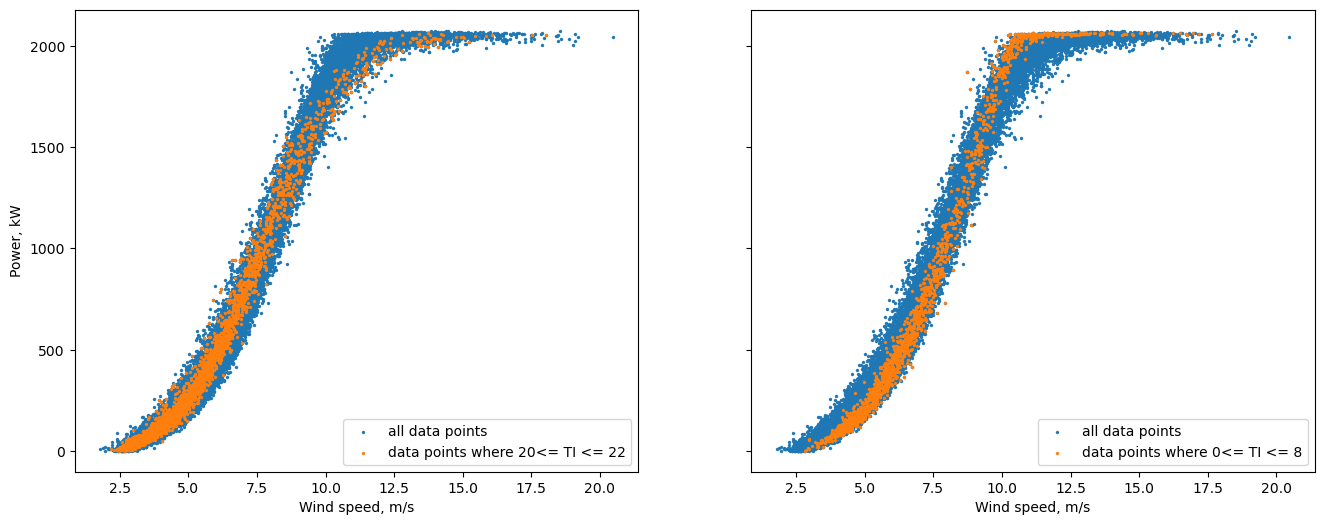

In [27]:
func.plot_TIeffect(df=data_clean, turbine_name= site + "_WTG01", ws_range1 = (0,8), ws_range2 = (20,22), figsize=(16,6))

### Split data

In [28]:
# define training size and thus number of samples per turbine
train_size = 10000

In [29]:
# sample the data. select equal number of training samples from each turbine. 
data_train = data_clean.groupby('instanceID', group_keys=False).apply(lambda x: x.sample(train_size, 
                                                                                 random_state = 22))

In [32]:
data_train

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power
297234,2020-04-08 07:00:00,4,8,7,C_WTG01,4.412141,0.516606,11.708731,8.096667,128.348421
687645,2020-08-15 09:30:00,8,15,9,C_WTG01,3.149435,0.554545,17.607774,17.141667,38.703493
857136,2020-10-10 10:40:00,10,10,10,C_WTG01,7.768857,1.896365,24.409827,9.886666,1218.061533
425313,2020-05-20 15:30:00,5,20,15,C_WTG01,8.413504,1.113023,13.229011,15.100000,1032.686743
614733,2020-07-22 06:50:00,7,22,6,C_WTG01,6.044404,0.643623,10.648254,10.698333,521.232246
...,...,...,...,...,...,...,...,...,...,...
708434,2020-08-22 06:20:00,8,22,6,C_WTG21,4.308890,0.588756,13.663750,12.983333,140.979310
446627,2020-05-27 16:30:00,5,27,16,C_WTG21,3.322066,0.674773,20.311858,16.425000,50.819031
933197,2020-11-04 14:10:00,11,4,14,C_WTG21,4.677596,0.696634,14.892993,7.775000,289.045580
43679,2020-01-15 10:30:00,1,15,10,C_WTG21,10.335113,2.067892,20.008413,5.273333,1747.515641


### Export data

In [33]:
# data_clean.to_csv("C://Users//User//Desktop//Wind-turbine-performance-modelling//Data_clean//" + site + "_data_clean.csv")

In [34]:
# data_train.to_csv("C://Users//User//Desktop//Wind-turbine-performance-modelling//Data_clean//" + site + "_data_train.csv")